In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Odin as backend

In [2]:
# in this test I want to test the update() function of fields. When I change the velocity, the backend matrices must be updated

# geometric parameters
LenX = 1
LenY = 0.3
resolution = 20

#velocity in x direction: [ m/s ]
velX = 0.1

# thermal conductivity [ W / (m K) ]
k = 0.1

# const temperature at left/right boundaries [K]
T_l = 1
T_r = 0

geom = backend.createGeometry( 'rectangle', [LenX, LenY] )
mesh = backend.createMesh( geom, res=resolution )

myFlowModels = [
    backend.FlowModels.ScalarConvectionDiffusion(depVariableName='T', velocityFieldName='u', diffusionCoeffName='k')
]

sim1 = backend.Simulation(myFlowModels, mesh, geom )

{'governor': <Fields.fieldGovernor object at 0x7f833e08bee0>, 'invCellDist': <Fields.vectorField object at 0x7f833e08bd60>, 'T': <ScalarField.scalarField object at 0x7f833e0960d0>, 'u': <Fields.vectorField object at 0x7f833e096190>, 'k': 0.1}
temp profile:


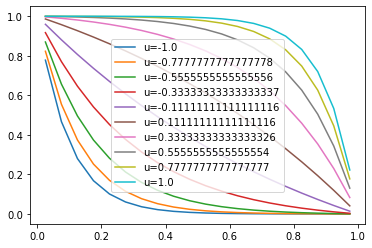

In [3]:
myFields = sim1.getFieldRegistry()

# changing boundary conditions
T = myFields['T']
T.setBoundaryCondition('top', 'zeroGradient')
T.setBoundaryCondition('bottom', 'zeroGradient')
T.setBoundaryCondition('left', T_l)
T.setBoundaryCondition('right', T_r)
T.setConstSource(0.0)

myFields['k'] = k

print(myFields)

U = myFields['u']

print("temp profile:")
import matplotlib.pyplot as plt

nbcellsX = sim1._mesh._cells_x
cellSpacing = sim1._mesh._uniformSpacing
L = geom._lenX
xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ax = plt.gca()

for u in np.linspace(-1,1,10):

    # not so beautiful syntax:
    U.u = u
    U.v = 0

    sim1.solve('T')
    ySim = T._raw[0,:]
    ax.plot(xSim, ySim, '-', label="u={u}".format(**locals()))

plt.legend()
plt.show()

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)